# HW 8: Dimensionality Reduction

In [13]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import sklearn.cluster as skc
import sklearn.decomposition as skd
import sklearn.manifold as skm
import sklearn.preprocessing as skp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', color_codes=True, font_scale=1.3)

In [14]:
import warnings
warnings.filterwarnings('ignore', lineno=590)

In [15]:
df = pd.read_csv('uscrime.csv')
df.head()

,R,Age,Ed,Ex0,Ex1,LF,M,N,U1,U2,W,X
0,79.1,151,91,58,56,510,950,33,108,41,394,261
1,163.5,143,113,103,95,583,1012,13,96,36,557,194
2,57.8,142,89,45,44,533,969,18,94,33,318,250
3,196.9,136,121,149,141,577,994,157,102,39,673,167
4,123.4,141,121,109,101,591,985,18,91,20,578,174


(b) Draw three 2-D scatterplots to visualize the dataset by using the following dimensionality reduction methods respectively. Prior to these analyses, you should normalize the data properly

In [17]:
import sklearn.preprocessing as skp

df_norm = df.copy()
df_norm[:] = skp.scale(df, axis=0, with_mean=True, with_std=True, copy=True)
df_norm.head()

,R,Age,Ed,Ex0,Ex1,LF,M,N,U1,U2,W,X
0,-0.298163,0.999382,-1.322656,-0.918333,-0.876069,-1.280441,-1.132720,-0.096034,0.702621,0.840356,-1.376330,1.697520
1,1.907645,0.355944,0.665173,0.612222,0.533794,0.545491,0.994049,-0.627045,0.029823,0.241921,0.331211,0.000000
2,-0.854843,0.275515,-1.503368,-1.360493,-1.309873,-0.705147,-0.480968,-0.494292,-0.082310,-0.117141,-2.172484,1.418822
3,2.780560,-0.207064,1.388020,2.176788,2.196710,0.395415,0.376600,3.196235,0.366222,0.600982,1.546393,-0.684075
4,0.859625,0.195085,1.388020,0.816296,0.750696,0.745593,0.067876,-0.494292,-0.250510,-1.673072,0.551201,-0.506722


(b)-1: PCA

In [35]:
pca_model = skd.PCA().fit(df_norm)

In [38]:
pca_model.components_.shape

(12, 12)

In [19]:
pca_model.explained_variance_

array([ 4.96973481,  2.33180137,  1.83004456,  1.21307784,  0.60383795,
        0.31920199,  0.2449876 ,  0.22096815,  0.12832731,  0.07693884,
        0.0559042 ,  0.00517538])

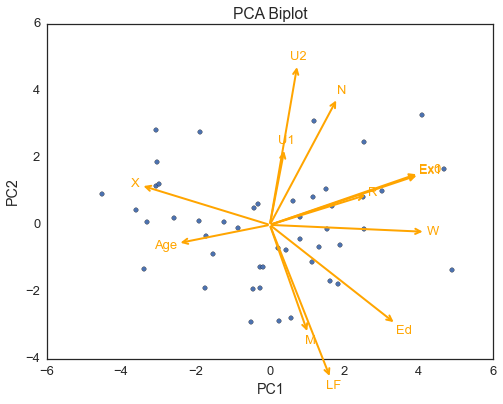

In [45]:
# Scatterplot of disaggregated data
X = pca_model.transform(df_norm.ix[:,:12])
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Biplot')
plt.ylim(-4, 6)

# Add variable unit vector projections
V = pca_model.transform(np.identity(X.shape[1]))
for i, v in enumerate(V):
    plt.annotate(df_norm.columns[i], 
                 xy=(0,0), xytext=v[:2]*10, 
                 fontsize=13, color='orange',
                 arrowprops=dict(
                    arrowstyle='<-', linewidth=2, color='orange'))

(b)-2: Isomap

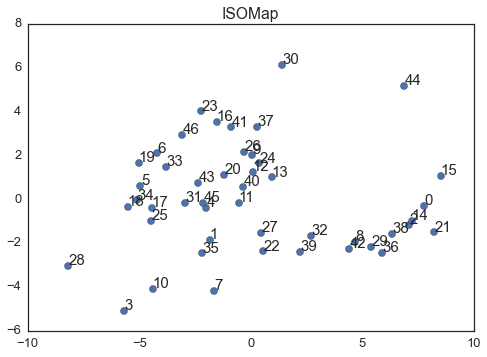

In [105]:
X = skm.Isomap().fit_transform(df_norm)
plt.scatter(X[:,0],X[:,1],s=50)

plt.title('ISOMap')

for i, s in enumerate(df_norm.index):
    plt.annotate(s, xy=X[i,:2]+0.05, fontsize=15)

(b)-3: MDS

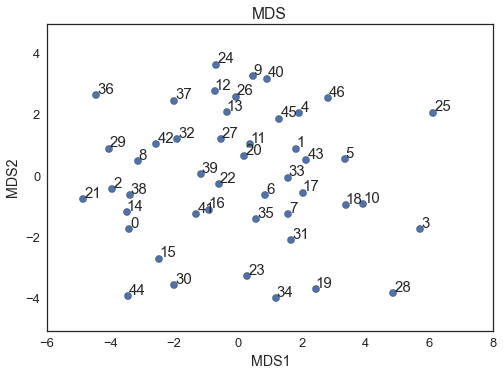

In [95]:
X = skm.MDS(n_components=2).fit_transform(df_norm)
plt.scatter(X[:,0],X[:,1],s=50)

plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.title('MDS')

for i, s in enumerate(df_norm.index):
    plt.annotate(s, xy=X[i,:2]+0.05, fontsize=15)

(b)-4: t-SNE

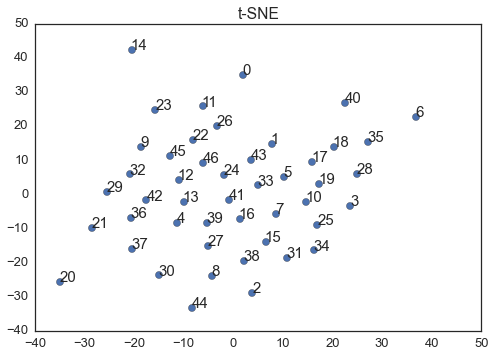

In [93]:
X = skm.TSNE(learning_rate=100).fit_transform(df_norm)
plt.scatter(X[:,0],X[:,1],s=50)

plt.title('t-SNE')

for i, s in enumerate(df_norm.index):
    plt.annotate(s, xy=X[i,:2]+0.05, fontsize=15)

(c) Perform PCA with scaling, and answer the questions:

(PCA with scaling executed earlier in the homework.)

(c)-1: How many principle components are there in total?

In [106]:
pca_model = skd.PCA().fit(df_norm)

In [107]:
pca_model.components_.shape

(12, 12)

There are 12 principle components

(c-2) What are the variances explained by each principal component?

In [108]:
pca_model.explained_variance_

array([ 4.96973481,  2.33180137,  1.83004456,  1.21307784,  0.60383795,
        0.31920199,  0.2449876 ,  0.22096815,  0.12832731,  0.07693884,
        0.0559042 ,  0.00517538])

(c-3) How many principal components explain an amount of variance that is greater than 1? You should be able to get this number programmatically (instead of counting manually).

In [109]:
pca_gr1 = pca_model.explained_variance_ > 1
pca_gr1

array([ True,  True,  True,  True, False, False, False, False, False,
       False, False, False], dtype=bool)

There are 4 principle components with variance greater than 1.

(c-4) Show these principal components as vectors. You should be able to generate a matrix as follows.

In [110]:
pd.DataFrame(pca_model.components_[:4,:].T,
            index=df_norm.columns, columns=['PC1','PC2','PC3','PC4'])

,PC1,PC2,PC3,PC4
R,0.266860,0.086739,-0.116822,0.646893
Age,-0.311629,-0.071419,-0.160223,0.439389
Ed,0.342421,-0.324221,0.109941,-0.102357
Ex0,0.403934,0.156912,-0.152719,0.157916
Ex1,0.404971,0.151668,-0.156180,0.129160
LF,0.152985,-0.489833,-0.002056,0.162141
M,0.097777,-0.355583,0.453042,0.390083
N,0.182596,0.391949,-0.288349,0.028383
U1,0.025708,0.241646,0.657893,0.025006
U2,0.057531,0.492167,0.416887,0.109818


(d) Draw a Scree Plot, and answer the following questions:

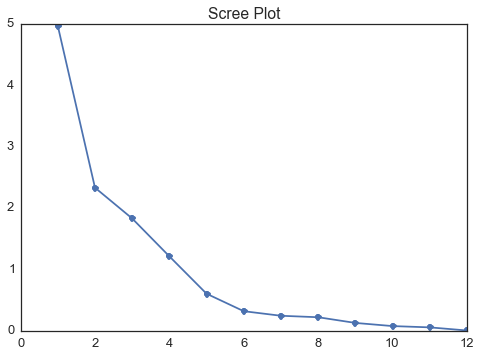

In [33]:
plt.plot(range(1,13), pca_model.explained_variance_, 'b-o')
plt.title('Scree Plot')

(d-1) What do scree plots tell you in general?

A Scree Plot is a line plot that shows the fraction of total variance in the data as explained or represented by each principle component. The PCs are ordered, and by definition are therefore assigned a number label, by decreasing order of contribution to total variance. (Source: improvedoutcomes.com)

(d-2) What can you tell about the data from this specific Scree Plot?

This scree plot shows that 4 of these factors explain most of the variability because the line starts to straighten after factor 4. The remaining factors explain a very small proportion of the variability and are likely unimportant.

(Source: http://support.minitab.com/en-us/minitab/17/topic-library/modeling-statistics/multivariate/principal-components-and-factor-analysis/what-is-a-scree-plot/)

(e) Draw a biplot of the PCA results. Then answer the following questions:

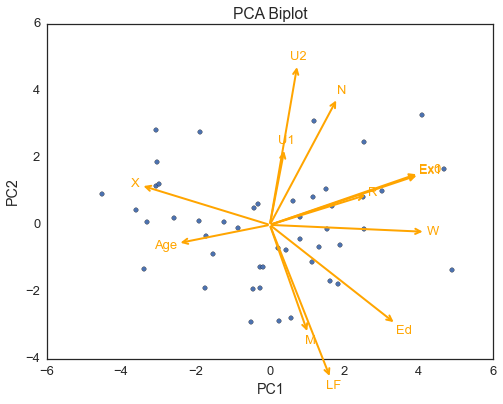

In [34]:
# Scatterplot of disaggregated data
X = pca_model.transform(df_norm.ix[:,:13])
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Biplot')
plt.ylim(-4, 6)

# Add variable unit vector projections
V = pca_model.transform(np.identity(X.shape[1]))
for i, v in enumerate(V):
    plt.annotate(df_norm.columns[i], 
                 xy=(0,0), xytext=v[:2]*10, 
                 fontsize=13, color='orange',
                 arrowprops=dict(
                    arrowstyle='<-', linewidth=2, color='orange'))

(e-1) From the biplot, what can you say about Ex0 (1960 per capita police expenditure) and Ex1 (1959 per capita police expenditure)? Plot a scatterplot of these two variables and compute the Pearson’s correlation coefficient to justify your answer.

From the biplot it is apparent that Ex0 and Ex1 have identical or almost identical points on the plot, therefore the correlation coefficient should be close to 1.

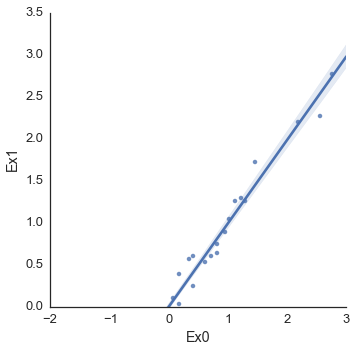

In [97]:
sns.lmplot(x='Ex0', y='Ex1', data=df_norm);
plt.ylim(0, 3.5);

In [103]:
df_norm.Ex0.corr(df_norm.Ex1)

0.99358648319788667

(e-2) From the biplot, what can you say about W (median assets/income) and Age (proportion of males 14-24)? Plot a scatterplot of these two variables and compute the Pearson’s correlation coefficient to justify your answer.

From the biplot it is clear that W and Age are extremely different in terms of PC1. W is at -2 on the x-axis and Age is at 4. Therefore the correlation will be negative.

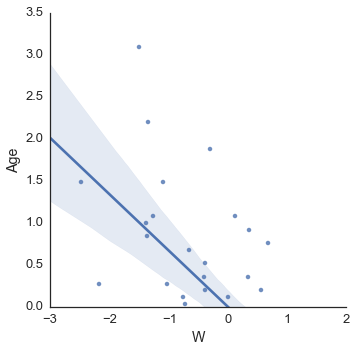

In [98]:
sns.lmplot(x='W', y='Age', data=df_norm);
plt.ylim(0, 3.5);

In [102]:
df_norm.W.corr(df_norm.Age)

-0.67005505578595193

# Q2. EFA: Managerial Skills Survey Analysis

In [49]:
df_2 = pd.read_csv('manage.csv')
df_2.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11
0,CONSIDERABLE EXTENT,CONSIDERABLE EXTENT,MODERATE EXTENT,MODERATE EXTENT,MODERATE EXTENT,SOME EXTENT,CONSIDERABLE EXTENT,SOME EXTENT,CONSIDERABLE EXTENT,MODERATE EXTENT,CONSIDERABLE EXTENT
1,GREAT EXTENT,MODERATE EXTENT,CONSIDERABLE EXTENT,GREAT EXTENT,CONSIDERABLE EXTENT,GREAT EXTENT,CONSIDERABLE EXTENT,GREAT EXTENT,GREAT EXTENT,GREAT EXTENT,CONSIDERABLE EXTENT
2,CONSIDERABLE EXTENT,GREAT EXTENT,GREAT EXTENT,TO A VERY GREAT EXTENT,TO A VERY GREAT EXTENT,TO A VERY GREAT EXTENT,GREAT EXTENT,GREAT EXTENT,CONSIDERABLE EXTENT,CONSIDERABLE EXTENT,GREAT EXTENT
3,CONSIDERABLE EXTENT,CONSIDERABLE EXTENT,CONSIDERABLE EXTENT,CONSIDERABLE EXTENT,CONSIDERABLE EXTENT,MODERATE EXTENT,MODERATE EXTENT,MODERATE EXTENT,CONSIDERABLE EXTENT,CONSIDERABLE EXTENT,CONSIDERABLE EXTENT
4,CONSIDERABLE EXTENT,CONSIDERABLE EXTENT,CONSIDERABLE EXTENT,GREAT EXTENT,CONSIDERABLE EXTENT,MODERATE EXTENT,MODERATE EXTENT,MODERATE EXTENT,SOME EXTENT,MODERATE EXTENT,SOME EXTENT


(b) Convert the survey answers into numeric formats according to the following scale: 
VERY LITTLE EXTENT 1
LITTLE EXTENT 2
SOME EXTENT 3
MODERATE EXTENT 4
CONSIDERABLE EXTENT 5
GREAT EXTENT 6
TO A VERY GREAT EXTENT 7

In [71]:
#method found on StackOverflow
#http://stackoverflow.com/questions/33442796/fast-way-to-convert-strings-into-lists-of-ints-in-a-pandas-column

mapping = {"VERY LITTLE EXTENT":1, "LITTLE EXTENT":2, "SOME EXTENT":3, "MODERATE EXTENT":4, "CONSIDERABLE EXTENT":5, "GREAT EXTENT":6, "TO A VERY GREAT EXTENT":7}
df_2_num = df_2.apply(lambda x: np.array([mapping[char] for char in x]))
df_2_num.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11
0,5,5,4,4,4,3,5,3,5,4,5
1,6,4,5,6,5,6,5,6,6,6,5
2,5,6,6,7,7,7,6,6,5,5,6
3,5,5,5,5,5,4,4,4,5,5,5
4,5,5,5,6,5,4,4,4,3,4,3


(c) Perform EFA. Experiment with different settings of 1, 2 and 3 factors respectively. Show the factor loadings under each setting. You should obtain a matrix that looks like this:

In [111]:
#1-factor model
fa_model = skd.FactorAnalysis(n_components=1).fit(df_2_num.ix[:,:11])

pd.DataFrame(fa_model.components_[:1,:].T, 
             index=df_2_num.columns,
             columns=['Factor1'])

,Factor1
q1,0.496705
q2,0.690525
q3,0.619649
q4,0.652723
q5,0.568174
q6,0.800546
q7,0.851144
q8,0.683129
q9,0.591450
q10,0.675984


In [112]:
#2-factor model
fa_model = skd.FactorAnalysis(n_components=2).fit(df_2_num.ix[:,:11])

pd.DataFrame(fa_model.components_[:2,:].T, 
             index=df_2_num.columns,
             columns=['Factor1', 'Factor2'])

,Factor1,Factor2
q1,0.482880,-0.385668
q2,0.700832,-0.449409
q3,0.608596,-0.337814
q4,0.638492,-0.353686
q5,0.600315,0.178145
q6,0.882545,0.563022
q7,0.898772,0.318227
q8,0.761418,0.550336
q9,0.540986,-0.112421
q10,0.644295,-0.098667


In [114]:
#3-factor model
fa_model = skd.FactorAnalysis(n_components=3).fit(df_2_num.ix[:,:11])

df_factor3 = pd.DataFrame(fa_model.components_[:3,:].T, 
             index=df_2_num.columns,
             columns=['Factor1', 'Factor2', 'Factor3'])
df_factor3

,Factor1,Factor2,Factor3
q1,0.520269,-0.322068,0.087115
q2,0.761505,-0.409129,-0.163937
q3,0.637311,-0.267673,-0.022856
q4,0.663764,-0.263731,-0.045500
q5,0.570236,0.241547,-0.250002
q6,0.809820,0.648087,-0.119632
q7,0.853406,0.418560,-0.245228
q8,0.692235,0.626117,-0.047060
q9,0.587515,-0.017452,0.613462
q10,0.671758,-0.012623,0.331820


(d) (Extra Credit) Visualize the factor loadings using seaborn's clustermap function. Do this for the three-factor setting only.

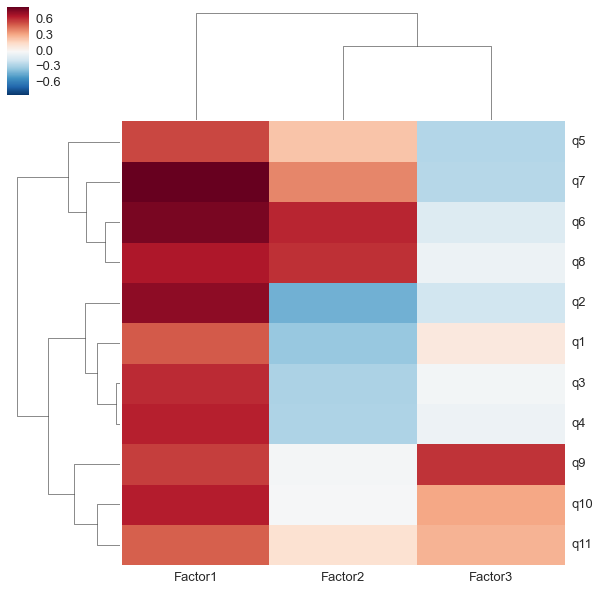

In [81]:
sns.clustermap(df_factor3)

(e) For the three-factor setting in (c), provide an intuitive explanation to the meaning of each factor.

*Explanation based on the questions asked of the participants.

Factor 1: q1, q2, q3, q4, q5, q6, q7, q8 -- Positive, Encouraging and High-Acheiving

Factor 2: q5, q6, q7, q8 -- High-Acheiving 

Factor 3: q9, q10, q11 -- Level-headed and Organized

Worked with Tom Zidar and Brandon Wong